- A problem with training neural networks is in the choice of the number of training epochs to use
- Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset
- Callbacks provide a way to execute code and interact with the training model process automatically
- The EarlyStopping callback will stop training once triggered, but the model at the end of training may not be the model with best performance on the validation dataset.
- An additional callback is required that will save the best model observed during training for later use. This is the ModelCheckpoint callback.
- The ModelCheckpoint callback is flexible in the way it can be used, but in this case we will use it only to save the best model observed during training as defined by a chosen performance measure on the validation dataset.

#### Overfit Multilayer Perceptron

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Train: 1.000, Test: 0.914


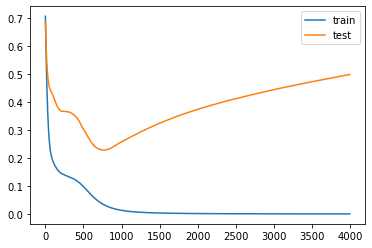

In [1]:
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

#### With Early Stopping

Epoch 00224: early stopping
Train: 0.967, Test: 0.814


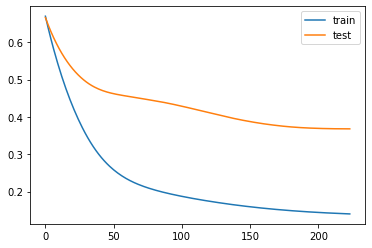

In [2]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

#### With EarlyStopping and patience

Epoch 01132: early stopping
Train: 1.000, Test: 0.943


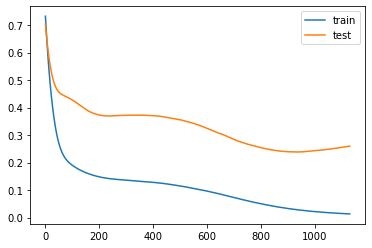

In [3]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

This means that although the performance of the model has improved, we may not have the best performing or most stable model at the end of training. We can address this by using a ModelChecckpoint callback

In [4]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0, callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 00001: val_accuracy improved from -inf to 0.81429, saving model to best_model.h5

Epoch 00002: val_accuracy did not improve from 0.81429

Epoch 00003: val_accuracy did not improve from 0.81429

Epoch 00004: val_accuracy did not improve from 0.81429

Epoch 00005: val_accuracy did not improve from 0.81429

Epoch 00006: val_accuracy did not improve from 0.81429

Epoch 00007: val_accuracy did not improve from 0.81429

Epoch 00008: val_accuracy did not improve from 0.81429

Epoch 00009: val_accuracy did not improve from 0.81429

Epoch 00010: val_accuracy did not improve from 0.81429

Epoch 00011: val_accuracy did not improve from 0.81429

Epoch 00012: val_accuracy did not improve from 0.81429

Epoch 00013: val_accuracy did not improve from 0.81429

Epoch 00014: val_accuracy did not improve from 0.81429

Epoch 00015: val_accuracy did not improve from 0.81429

Epoch 00016: val_accuracy did not improve from 0.81429

Epoch 00017: val_accuracy did not improve from 0.81429

Epoch 00018: va


Epoch 00151: val_accuracy did not improve from 0.81429

Epoch 00152: val_accuracy improved from 0.81429 to 0.82857, saving model to best_model.h5

Epoch 00153: val_accuracy did not improve from 0.82857

Epoch 00154: val_accuracy did not improve from 0.82857

Epoch 00155: val_accuracy did not improve from 0.82857

Epoch 00156: val_accuracy did not improve from 0.82857

Epoch 00157: val_accuracy did not improve from 0.82857

Epoch 00158: val_accuracy did not improve from 0.82857

Epoch 00159: val_accuracy did not improve from 0.82857

Epoch 00160: val_accuracy did not improve from 0.82857

Epoch 00161: val_accuracy did not improve from 0.82857

Epoch 00162: val_accuracy did not improve from 0.82857

Epoch 00163: val_accuracy did not improve from 0.82857

Epoch 00164: val_accuracy did not improve from 0.82857

Epoch 00165: val_accuracy did not improve from 0.82857

Epoch 00166: val_accuracy did not improve from 0.82857

Epoch 00167: val_accuracy did not improve from 0.82857

Epoch 00168:


Epoch 00308: val_accuracy did not improve from 0.84286

Epoch 00309: val_accuracy did not improve from 0.84286

Epoch 00310: val_accuracy did not improve from 0.84286

Epoch 00311: val_accuracy did not improve from 0.84286

Epoch 00312: val_accuracy did not improve from 0.84286

Epoch 00313: val_accuracy did not improve from 0.84286

Epoch 00314: val_accuracy did not improve from 0.84286

Epoch 00315: val_accuracy did not improve from 0.84286

Epoch 00316: val_accuracy did not improve from 0.84286

Epoch 00317: val_accuracy did not improve from 0.84286

Epoch 00318: val_accuracy did not improve from 0.84286

Epoch 00319: val_accuracy did not improve from 0.84286

Epoch 00320: val_accuracy did not improve from 0.84286

Epoch 00321: val_accuracy did not improve from 0.84286

Epoch 00322: val_accuracy did not improve from 0.84286

Epoch 00323: val_accuracy did not improve from 0.84286

Epoch 00324: val_accuracy did not improve from 0.84286

Epoch 00325: val_accuracy did not improve from 


Epoch 00460: val_accuracy did not improve from 0.84286

Epoch 00461: val_accuracy did not improve from 0.84286

Epoch 00462: val_accuracy did not improve from 0.84286

Epoch 00463: val_accuracy did not improve from 0.84286

Epoch 00464: val_accuracy did not improve from 0.84286

Epoch 00465: val_accuracy did not improve from 0.84286

Epoch 00466: val_accuracy did not improve from 0.84286

Epoch 00467: val_accuracy did not improve from 0.84286

Epoch 00468: val_accuracy did not improve from 0.84286

Epoch 00469: val_accuracy did not improve from 0.84286

Epoch 00470: val_accuracy did not improve from 0.84286

Epoch 00471: val_accuracy did not improve from 0.84286

Epoch 00472: val_accuracy did not improve from 0.84286

Epoch 00473: val_accuracy did not improve from 0.84286

Epoch 00474: val_accuracy did not improve from 0.84286

Epoch 00475: val_accuracy did not improve from 0.84286

Epoch 00476: val_accuracy did not improve from 0.84286

Epoch 00477: val_accuracy did not improve from 


Epoch 00605: val_accuracy did not improve from 0.90000

Epoch 00606: val_accuracy did not improve from 0.90000

Epoch 00607: val_accuracy did not improve from 0.90000

Epoch 00608: val_accuracy did not improve from 0.90000

Epoch 00609: val_accuracy improved from 0.90000 to 0.91429, saving model to best_model.h5

Epoch 00610: val_accuracy did not improve from 0.91429

Epoch 00611: val_accuracy did not improve from 0.91429

Epoch 00612: val_accuracy did not improve from 0.91429

Epoch 00613: val_accuracy did not improve from 0.91429

Epoch 00614: val_accuracy did not improve from 0.91429

Epoch 00615: val_accuracy did not improve from 0.91429

Epoch 00616: val_accuracy did not improve from 0.91429

Epoch 00617: val_accuracy did not improve from 0.91429

Epoch 00618: val_accuracy did not improve from 0.91429

Epoch 00619: val_accuracy did not improve from 0.91429

Epoch 00620: val_accuracy did not improve from 0.91429

Epoch 00621: val_accuracy did not improve from 0.91429

Epoch 00622:


Epoch 00753: val_accuracy did not improve from 0.92857

Epoch 00754: val_accuracy did not improve from 0.92857

Epoch 00755: val_accuracy did not improve from 0.92857

Epoch 00756: val_accuracy did not improve from 0.92857

Epoch 00757: val_accuracy did not improve from 0.92857

Epoch 00758: val_accuracy did not improve from 0.92857

Epoch 00759: val_accuracy did not improve from 0.92857

Epoch 00760: val_accuracy did not improve from 0.92857

Epoch 00761: val_accuracy did not improve from 0.92857

Epoch 00762: val_accuracy did not improve from 0.92857

Epoch 00763: val_accuracy did not improve from 0.92857

Epoch 00764: val_accuracy did not improve from 0.92857

Epoch 00765: val_accuracy did not improve from 0.92857

Epoch 00766: val_accuracy did not improve from 0.92857

Epoch 00767: val_accuracy did not improve from 0.92857

Epoch 00768: val_accuracy did not improve from 0.92857

Epoch 00769: val_accuracy did not improve from 0.92857

Epoch 00770: val_accuracy did not improve from 


Epoch 00907: val_accuracy did not improve from 0.94286

Epoch 00908: val_accuracy did not improve from 0.94286

Epoch 00909: val_accuracy did not improve from 0.94286

Epoch 00910: val_accuracy did not improve from 0.94286

Epoch 00911: val_accuracy did not improve from 0.94286

Epoch 00912: val_accuracy did not improve from 0.94286

Epoch 00913: val_accuracy did not improve from 0.94286

Epoch 00914: val_accuracy did not improve from 0.94286

Epoch 00915: val_accuracy did not improve from 0.94286

Epoch 00916: val_accuracy did not improve from 0.94286

Epoch 00917: val_accuracy did not improve from 0.94286

Epoch 00918: val_accuracy did not improve from 0.94286

Epoch 00919: val_accuracy did not improve from 0.94286

Epoch 00920: val_accuracy did not improve from 0.94286

Epoch 00921: val_accuracy did not improve from 0.94286

Epoch 00922: val_accuracy did not improve from 0.94286

Epoch 00923: val_accuracy did not improve from 0.94286

Epoch 00924: val_accuracy did not improve from 

We can see that the best model was observed at epoch 832 during this run